## 1. Design a deep learning model using an Artificial Neural Network (ANN) to classify patients

The model architecture is:

- Input layer: Accepts all the features (age, cholesterol, blood pressure, etc.).
- Hidden Layer 1: Dense layer with 128 neurons and ReLU activation.
- Hidden Layer 2: Dense layer with 64 neurons and ReLU activation.
- Output Layer: Dense layer with 1 neuron and sigmoid activation (for binary classification).

## 2. What activation function would you use in the output layer and why?

I would use the **sigmoid activation function** in the output layer because:

- It outputs a value between 0 and 1, representing the probability that a patient has heart disease.
- Since it is a **binary classification problem** (has_disease = 0 or 1), sigmoid is the ideal choice.

## 3. How would you handle class imbalance if has_disease = 1 is rare?

To handle class imbalance:

- **Use class weights** while training the model. It assigns a higher penalty to misclassifying the minority class.
- Optionally, techniques like **oversampling** (SMOTE) or **undersampling** could also be used.
- Using class weights ensures that the model pays more attention to the minority class without altering the original dataset.

In [49]:
# a. Import Libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Import libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# 1. Load Data
data = pd.read_csv('Heart.csv')


In [51]:
# 2. Preprocessing
# Convert target column to binary
data['AHD'] = data['AHD'].map({'No': 0, 'Yes': 1})

# Encode categorical columns
categorical_cols = ['ChestPain', 'Thal']
data = pd.get_dummies(data, columns=categorical_cols)

# Separate features and target
X = data.drop(['AHD'], axis=1)  # Drop target and unnamed index
y = data['AHD']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# # 4. Calculate class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

In [54]:
# 6. Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
from sklearn.utils import class_weight

# Calculate class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, class_weight=class_weights)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4736 - loss: 0.6982 - val_accuracy: 0.4286 - val_loss: 0.6939
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4643 - loss: 0.6966 - val_accuracy: 0.4286 - val_loss: 0.6935
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4469 - loss: 0.6940 - val_accuracy: 0.4286 - val_loss: 0.6932
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5007 - loss: 0.6930 - val_accuracy: 0.5714 - val_loss: 0.6928
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5940 - loss: 0.6871 - val_accuracy: 0.5714 - val_loss: 0.6927
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5686 - loss: 0.6913 - val_accuracy: 0.5714 - val_loss: 0.6928
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5485 - loss: 0.6947 - val_accuracy: 0.5714 - val_loss: 0.6930
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5764 - loss: 0.6901 - val_accuracy: 0.5714 - val_l

In [56]:
# 8. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5476 - loss: 0.6929
Test Accuracy: 0.52


## Model Evaluation (Confusion Matrix and Classification Report)

After training, it’s important to evaluate how the model performs beyond just accuracy, especially since we have class imbalance.
We'll use a confusion matrix and a classification report (precision, recall, f1-score).

In [57]:
# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold of 0.5

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B4E2454B80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


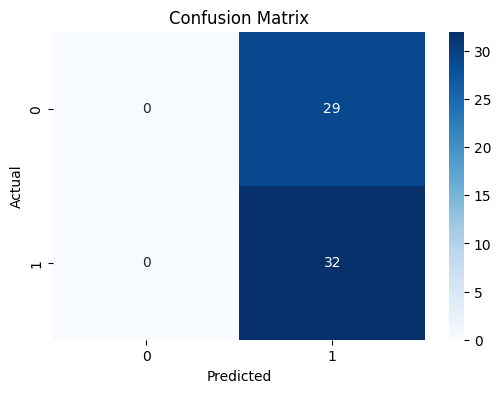

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.52      1.00      0.69        32

    accuracy                           0.52        61
   macro avg       0.26      0.50      0.34        61
weighted avg       0.28      0.52      0.36        61



C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

## Conclusion:
- Precision for Class 0 is currently 0, indicating that the model is failing to predict the majority class ("No Disease").
- Recall for Class 1 is 1.0, which is excellent, but it comes at the cost of a high number of false positives (low precision for class 1).

- This is done to ensure that all patients with heart disease get identified even if there are false positives, as **saving a life matters more than guessing it wrong.**